In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from peiplib.plot import tango_hex as tango

# 1. Matplotlib customization

In [2]:
plt.rc('font', size=18, serif=[])
plt.rc('lines', linewidth=2)
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')
plt.rc('figure', figsize=(7, 6), facecolor='w')
plt.rc('savefig', format='pdf', bbox='tight')
plt.rc('text', usetex=True)
plt.rc('grid', linestyle='--', color='#d3d7cf')

# 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## 2.1 Plotting the data

In [3]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data.insert(loc=0, column='Zero Feature', value=np.ones(data.shape[0]))
data.head(10)

,Zero Feature,Population,Profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233
5,1.0,8.3829,11.8860
6,1.0,7.4764,4.3483
7,1.0,8.5781,12.0000
8,1.0,6.4862,6.5987
9,1.0,5.0546,3.8166


In [4]:
def plot_data(df):
    """
    Plot the data points.
    
    Parameters
    ----------
    data : data-frame
        Data points.
    """

    plt.plot(
        data['Population'], data['Profit'], 'x',
        color=tango['skyblue3'], markersize=8,
        label='Training Data')

    plt.xlabel('Population of City in 10,000s')
    plt.ylabel(r'Profit in $\$$10,000s')

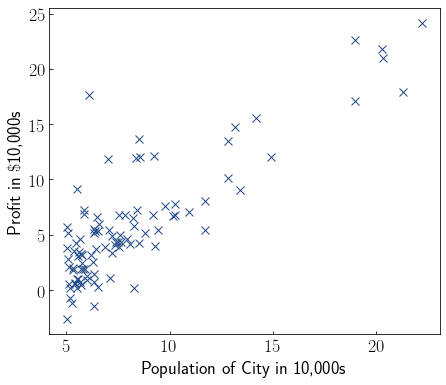

In [5]:
plot_data(data)

## 2.2 Gradient descent

In [6]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.
    
    Parameters
    ----------
    X : 2d-array
        Feature matrix.
    y : 1d-array
        Target variables.
    theta : 1d-array
        Fitting parameters.
    
    Returns
    -------
    J : float
        Cost value.
    """
    m = y.size
    r = np.dot(X, theta) - y
    return np.dot(r.T, r) / (2*m)


def gradient_descent(X, y, theta, alpha, niter, cost_history=False):
    """
    Performs gradient descent to learn fitting parameters, theta.
    
    Parameters
    ----------
    X : 2d-array
        Feature matrix.
    y : 1d-array
        Target variables.
    theta : 1d-array
        Initialized fitting parameters.
    alpha : float
        Learning rate.
    niter : int
        Number of iterations.
    cost_history : bool (optional, default: False)
        If True, returns an array of cost value computed for each iteration.

    Returns
    -------
    theta : 1d-array
        Fitting parameters found by gradient descent.
    J_history : 1d-array (optional)
        Cost value for each iteration/step.
    """
    m = y.size
    J_history = np.zeros(niter, dtype=np.float)
    for iiter in range(niter):
        r = np.dot(X, theta) - y
        delta = np.dot(X.T, r)
        theta -= (alpha/m) * delta
        J = np.dot(r.T, r) / (2*m)
        J_history[iiter] = J
        
    return (theta, J_history)

In [7]:
# Testing the cost function

J1 = compute_cost(data[['Zero Feature', 'Population']], data['Profit'], np.array([0., 0.]))
J2 = compute_cost(data[['Zero Feature', 'Population']], data['Profit'], np.array([-1., 2.]))

np.testing.assert_almost_equal(J1, 32.07, decimal=2)
np.testing.assert_almost_equal(J2, 54.24, decimal=2)

In [8]:
# Implementing gradient descent to find fitting parameters, theta

# Initilize fitting parameters
theta = np.zeros(2, dtype=np.float)

# Some gradient descent settings
alpha = 0.01
niter = 1500

theta, J_history = gradient_descent(data[['Zero Feature', 'Population']], data['Profit'], theta, alpha, niter)

np.testing.assert_almost_equal(theta[0], -3.6303, decimal=4)
np.testing.assert_almost_equal(theta[1], 1.1664, decimal=4)

# Print theta to screen
print('Theta values found by gradient descent: {:.4f}, {:.4f}\n'.format(*theta))

Theta values found by gradient descent: -3.6303, 1.1664



Text(0,0.5,'Cost Value, J($\\theta$)')

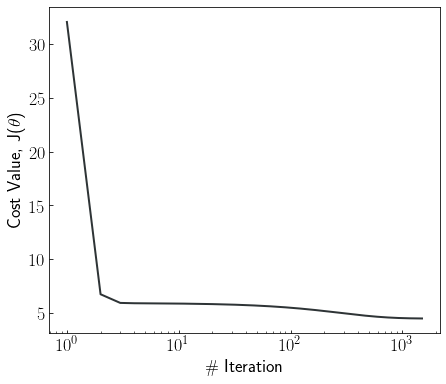

In [9]:
# Verify that gradient descent is working correctly;
# Plot the cost function values against the number of iteratios

fig, ax = plt.subplots(1, 1)
ax.semilogx(range(1, niter+1), J_history, color=tango['aluminium6'])
ax.set_xlabel(r'$\#$ Iteration')
ax.set_ylabel(r'Cost Value, J($\theta$)')

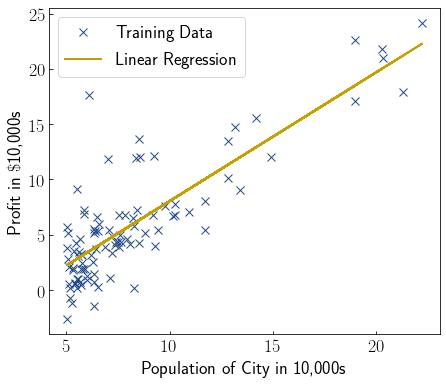

In [10]:
# Plot the linear fit

plot_data(data)
plt.plot(
    data['Population'], np.dot(data[['Zero Feature', 'Population']], theta),
    color=tango['butter3'], label='Linear Regression')

plt.legend()

In [11]:
# Make predictions on profits in areas of 35,000 and 70,000 people

populations = [35000, 70000]
predictions = [np.dot(np.array([1.0, p/10000.]), theta) for p in populations]

for i, (population, prediction) in enumerate(zip(populations, predictions)):
    print('For population of {}, we predict a profit of {:10.4f}'.format(population, prediction*10000.) + i*'\n')

For population of 35000, we predict a profit of  4519.7679
For population of 70000, we predict a profit of 45342.4501



## 2.3 Visualizing $J(\theta)$

In [12]:
@np.vectorize
def compute_cost_v(theta0, theta1):
    global X
    global y
    return compute_cost(X, y, np.array([theta0, theta1]))


theta0 = np.linspace(-10., 10., 100)
theta1 = np.linspace(-1., 4., 100)

theta_v0, theta_v1 = np.meshgrid(theta0, theta1, sparse=False)

X = data[['Zero Feature', 'Population']]
y = data['Profit']
J_grid = compute_cost_v(theta_v0, theta_v1)

Text(0.5,0,'$J(\\theta)$')

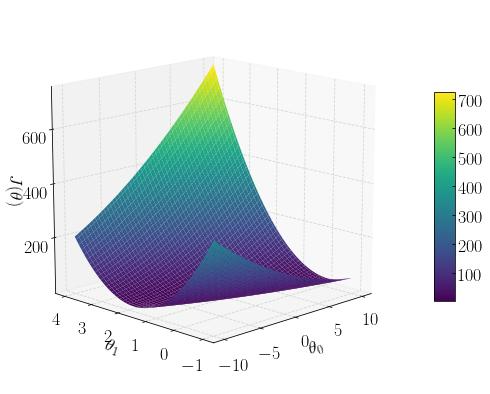

In [13]:
# Surface plot

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta_v0, theta_v1, J_grid, cmap='viridis')
fig.colorbar(surf, shrink=0.55, aspect=10)
ax.invert_xaxis()
ax.invert_yaxis()
ax.view_init(15, 45)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

Text(0,0.5,'$\\theta_1$')

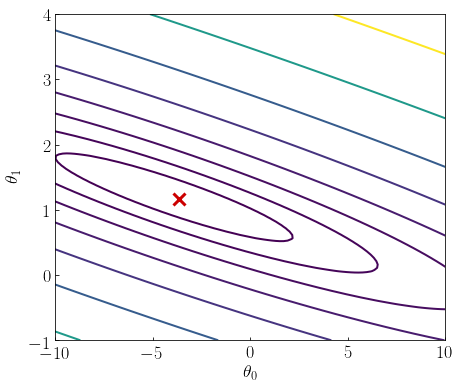

In [14]:
# Contour plot

fig, ax = plt.subplots(1, 1)
ax.contour(theta_v0, theta_v1, J_grid, np.logspace(-2, 3, 20))
ax.plot(theta[0], theta[1], 'x', color=tango['scarletred2'], markersize=12, markeredgewidth=3)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')